Generated Graph:
Vertex Cover Set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Independent Set: {10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209}
Thresh

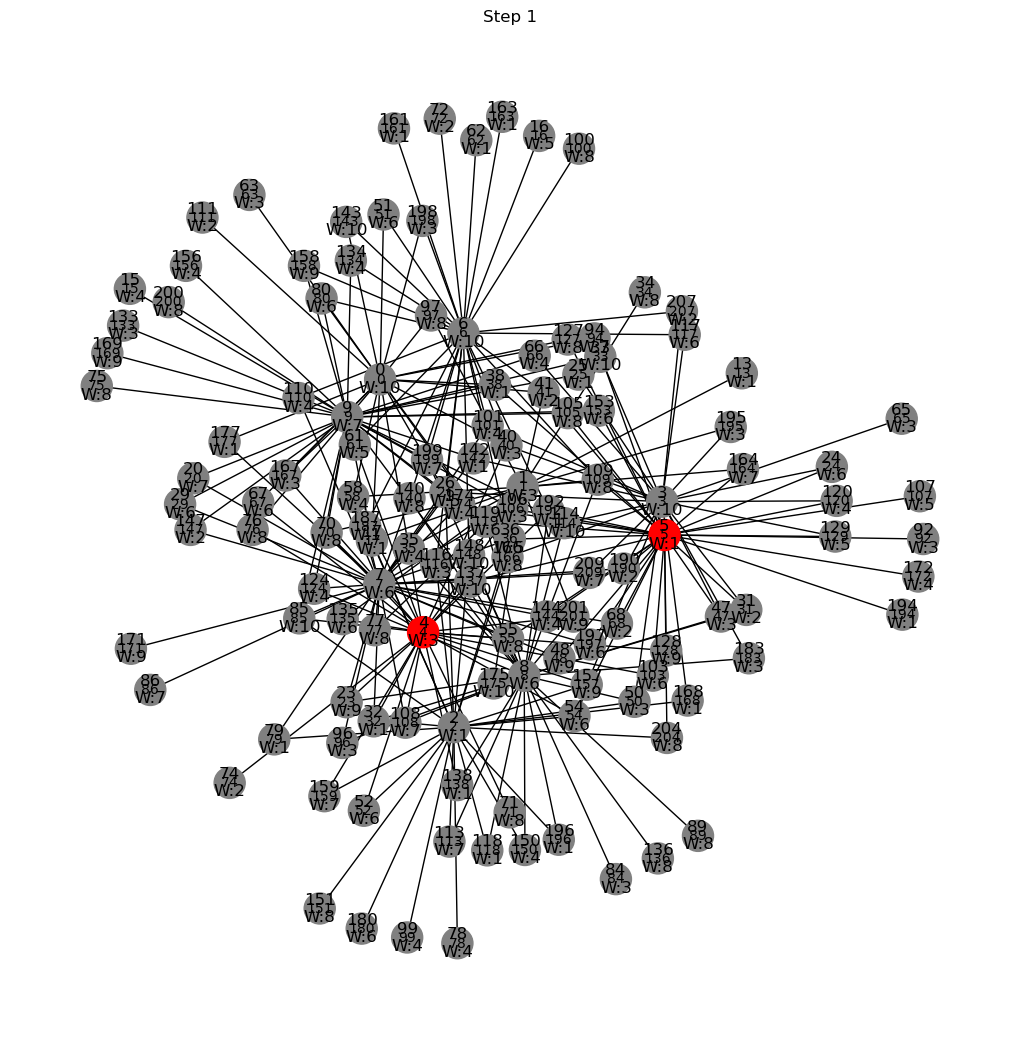

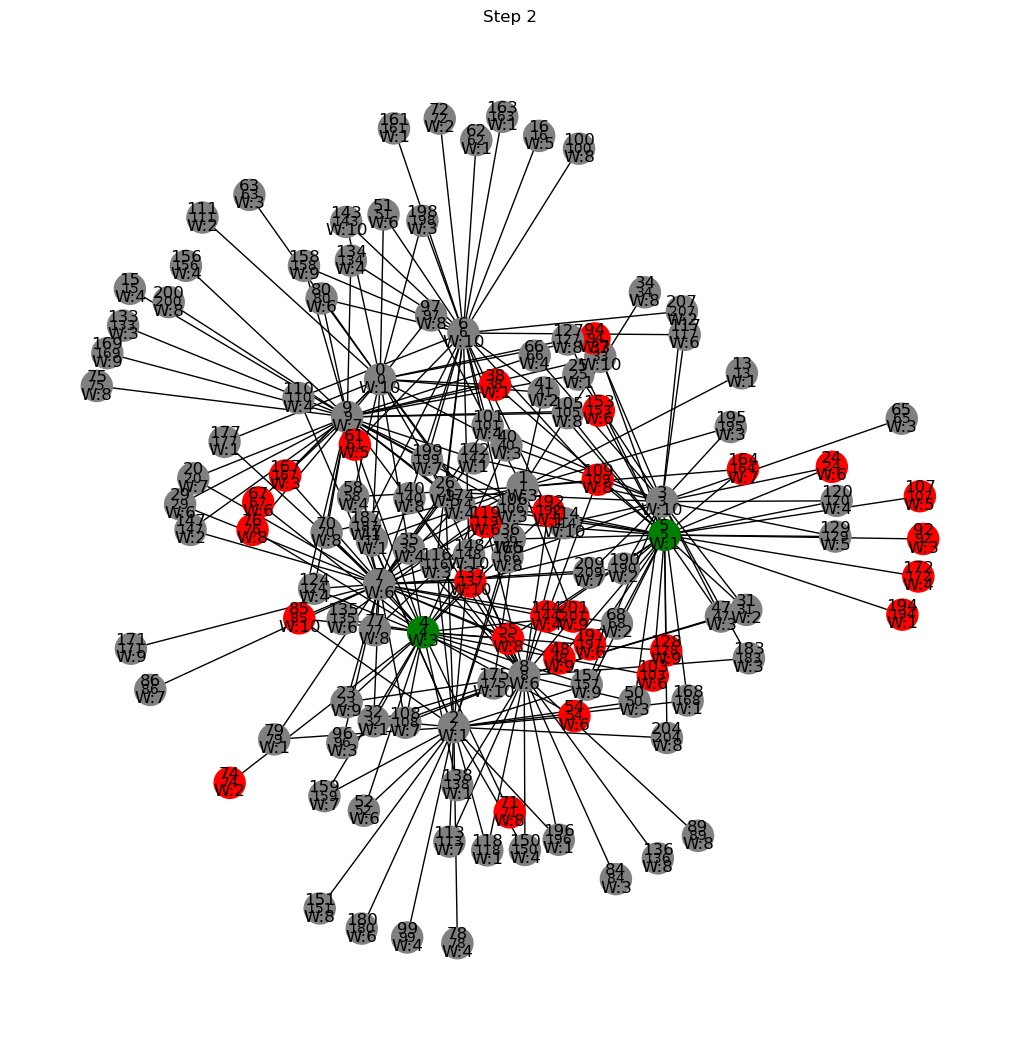

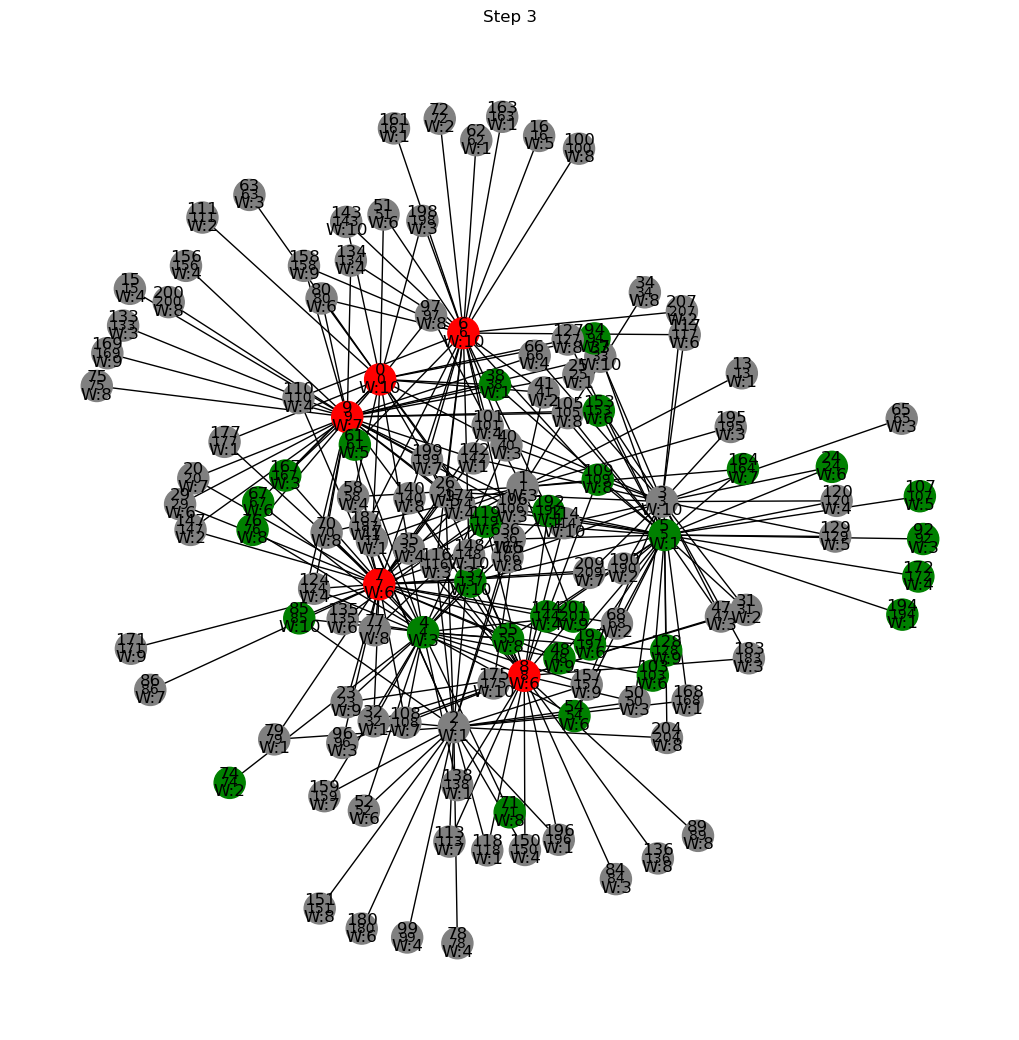

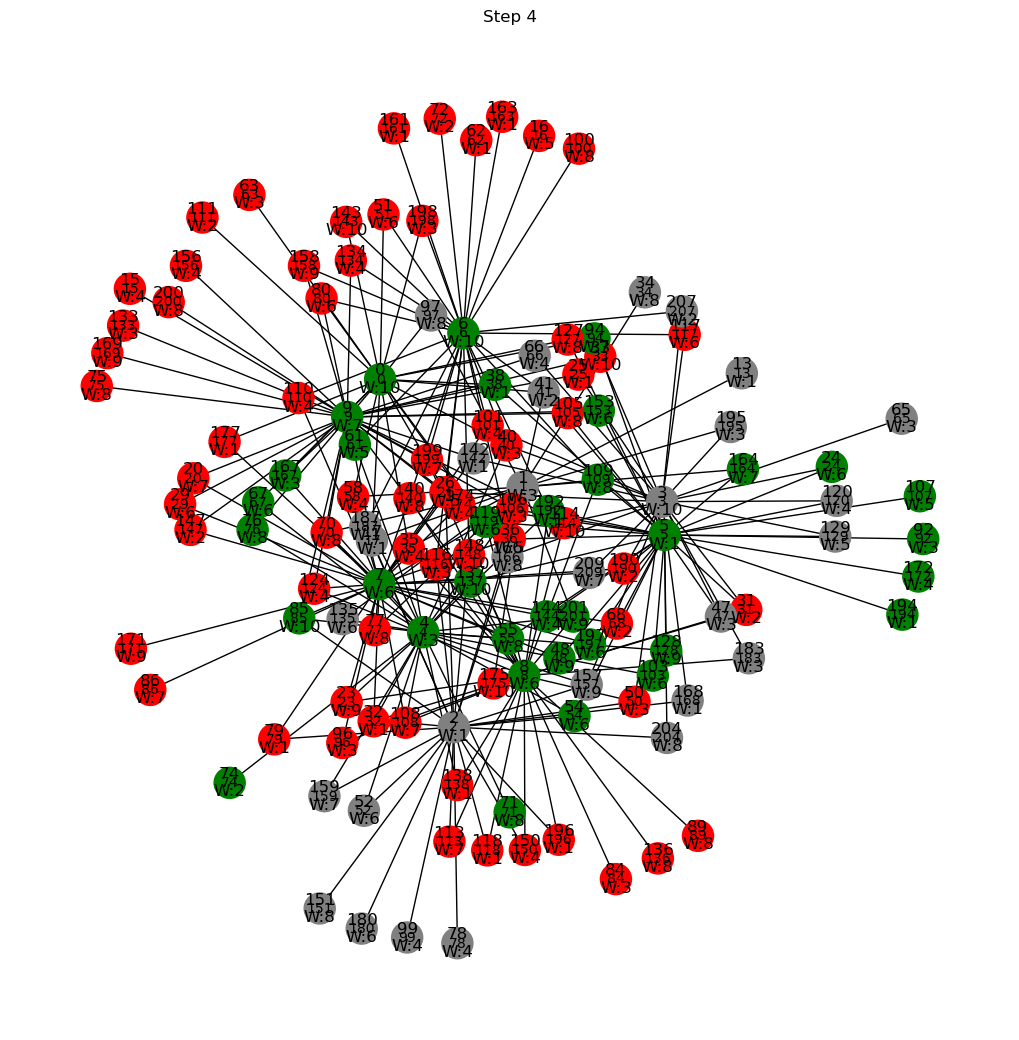

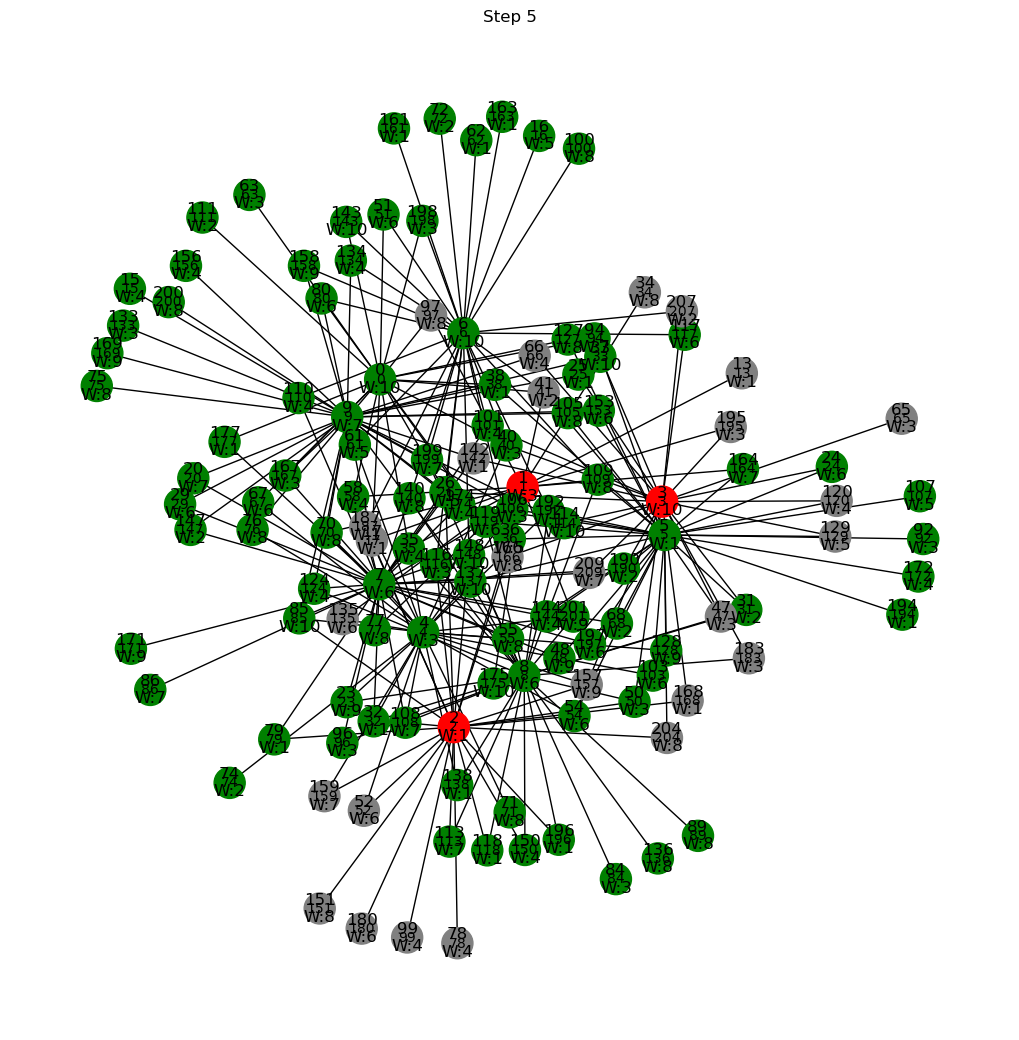

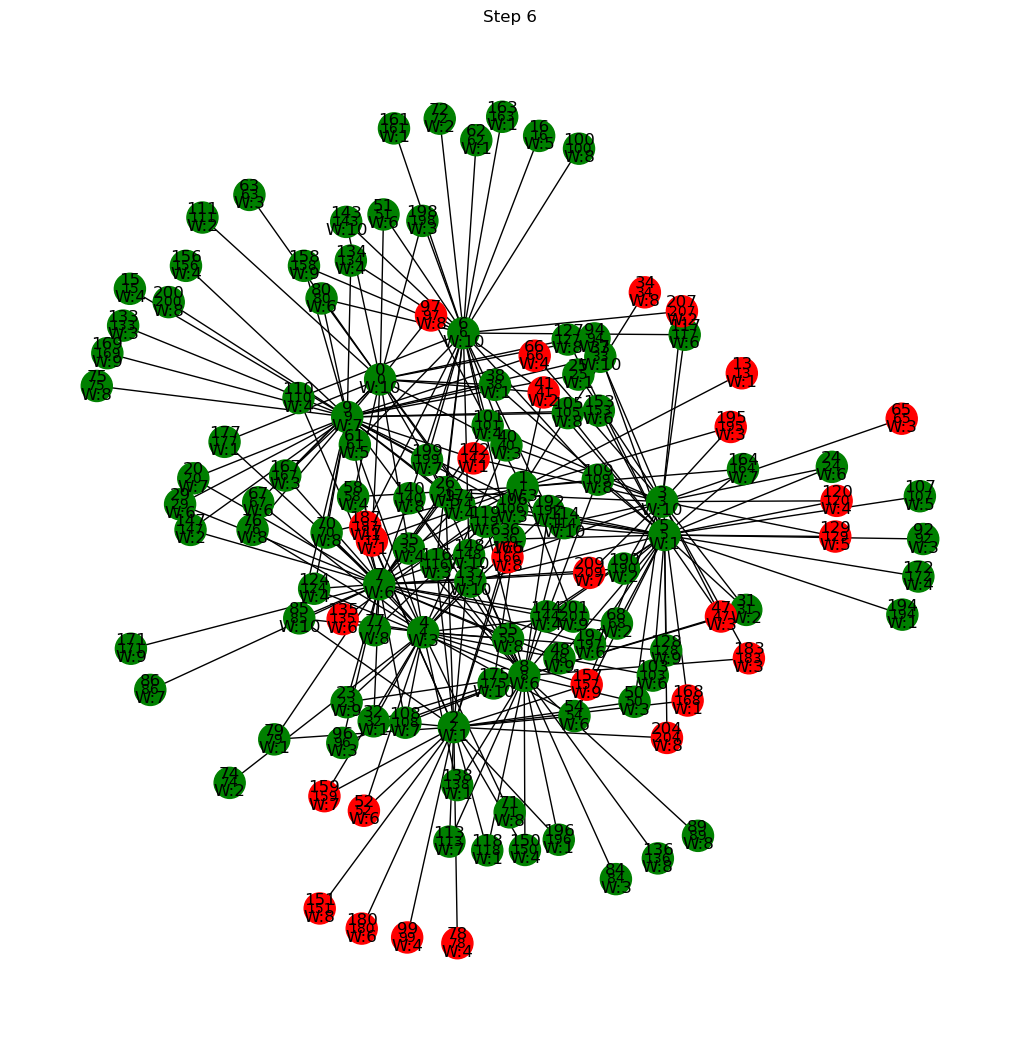

Total runtime: 3.00 seconds


In [8]:
"""
This code is written in a Jupyter Notebook Python environment. 
To ensure successful execution, please try to use a similar environment configuration. 
Running this code will generate the Vertex Cover Set, Independent Set,Weights 
Thresholds for each node, edges included in the graph, remaining nodes,Weights and their thresholds 
after applying the reduction rules, the partition of the Independent Set, 
the constructed set C, and the minimal target set. 
Additionally, it will visualize the process of activating the entire graph.
"""
import networkx as nx
import random
import matplotlib.pyplot as plt
import itertools
import time

class TargetSetSelectionWithWeights:
    """
    Adjust the number of nodes in the independent set by changing the value of num_nodes, 
    and control the number of nodes in the vertex cover set by changing the value of tau. 
    For example, num_nodes=104 and tau=4 means that the independent set contains 100 nodes 
    and the vertex cover set contains 4 nodes. 
    """
    def __init__(self, num_nodes=210, tau=10):
        """
        Initialize the TargetSetSelectionWithWeights class, generating a graph,
        reducing the graph, partitioning the independent set, building set C,
        and finding the minimal target set using a greedy algorithm. Also visualizes
        the activation process.

        Parameters:
        - num_nodes: Number of nodes in the graph
        - tau: Size of the vertex cover set
        """
        self.num_nodes = num_nodes
        self.tau = tau
        self.G = nx.Graph()  # Create an empty graph
        self.vertex_cover_set = set()  # Store the vertex cover set
        self.independent_set = set()  # Store the independent set
        self.thresholds = {}  # Store activation thresholds for each node
        self.weights = {}  # Store weights for each node

        start_time = time.time()
        self._generate_graph()  # Generate a random graph with weights
        self._reduce_graph()  # Reduce the graph structure
        self.subsets = self._partition_independent_set()  # Partition the independent set
        self.C = self._build_set_C()  # Build set C from the vertex cover and independent sets
        self.target_set = self._find_minimal_target_set_greedy()  # Find the minimal target set using a greedy algorithm
        self._verify_and_visualize_activation()  # Verify and visualize the activation process
        end_time = time.time()
        print(f"Total runtime: {end_time - start_time:.2f} seconds")

    def _generate_graph(self):
        """
        Generate a random bipartite-like graph with a vertex cover set and an independent set.
        The independent set nodes have random connections to the vertex cover set nodes,
        ensuring each independent node has at least one connection.
        Random thresholds and weights are assigned to each node.
        """
        self.G.add_nodes_from(range(self.num_nodes))
        for i in range(self.tau):
            self.vertex_cover_set.add(i)
        for i in range(self.tau, self.num_nodes):
            self.independent_set.add(i)

        # Increase connection probability and ensure each independent set node
        # is connected to at least one vertex cover set node
        for v in self.independent_set:
            connected = False
            for u in self.vertex_cover_set:
                if random.random() < 0.2:  # Increase connection probability
                    self.G.add_edge(u, v)
                    connected = True

        # Assign random thresholds and weights to each node
        self.thresholds = {v: random.randint(1, self.G.degree[v] + 1) if self.G.degree[v] > 0 else 0 for v in self.G.nodes()}
        self.weights = {v: random.randint(1, 10) for v in self.G.nodes()}

        print("Generated Graph:")
        print("Vertex Cover Set:", self.vertex_cover_set)
        print("Independent Set:", self.independent_set)
        print("Thresholds:", self.thresholds)
        print("Weights:", self.weights)
        print("Edges:", list(self.G.edges))

    def _reduce_graph(self):
        """
        Reduce the graph by removing nodes with thresholds that are either zero
        (no activation required) or greater than their degree (impossible to activate).
        Update thresholds for neighboring nodes after removal.
        """
        to_remove = set()
        for node in list(self.G.nodes()):
            if self.thresholds[node] == 0:
                to_remove.add(node)
            elif self.thresholds[node] > self.G.degree[node]:
                to_remove.add(node)

        # Remove the identified nodes and adjust the thresholds of their neighbors
        for node in to_remove:
            neighbors = list(self.G.neighbors(node))
            self.G.remove_node(node)
            for neighbor in neighbors:
                if neighbor in self.thresholds:
                    self.thresholds[neighbor] -= 1
                    if self.thresholds[neighbor] <= 0:
                        self.thresholds[neighbor] = 1  # Ensure the threshold is greater than 0
            if node in self.vertex_cover_set:
                self.vertex_cover_set.remove(node)
            if node in self.independent_set:
                self.independent_set.remove(node)

        print("Reduced Graph:")
        print("Remaining Nodes:", list(self.G.nodes()))
        print("Thresholds after Reduction:", self.thresholds)
        print("Weights after Reduction:", self.weights)

    def _partition_independent_set(self):
        """
        Partition the independent set into subsets where each subset shares
        the same neighbors in the vertex cover set. This is to optimize the target set selection process.
        """
        subsets = []
        neighbor_dict = {}
        for node in self.independent_set:
            neighbors = frozenset(self.G.neighbors(node))
            if neighbors not in neighbor_dict:
                neighbor_dict[neighbors] = []
            neighbor_dict[neighbors].append(node)

        # Create partitions based on shared neighbors
        for nodes in neighbor_dict.values():
            subsets.append(set(nodes))

        print("Partitions of Independent Set:", subsets)
        return subsets

    def _build_set_C(self):
        """
        Build set C by including all nodes in the vertex cover set and selecting the top tau nodes
        from each subset in the independent set based on their thresholds.
        """
        C = set(self.vertex_cover_set)
        for subset in self.subsets:
            sorted_subset = sorted(subset, key=lambda x: self.thresholds[x], reverse=True)
            for i in range(min(len(sorted_subset), self.tau)):
                C.add(sorted_subset[i])
        print("Set C:", C)
        return C

    def _find_minimal_target_set_greedy(self):
        """
        Find the minimal target set using a greedy algorithm. The algorithm selects nodes
        based on their weighted activation gain, which balances the number of newly activated nodes
        with the node's weight. The process continues until all nodes in the graph are activated.
        """
        target_set = set()
        active_set = set()

        def activation_gain(node):
            return sum(1 for neighbor in self.G.neighbors(node) if neighbor not in active_set and self.thresholds[neighbor] <= len([n for n in self.G.neighbors(neighbor) if n in active_set or n == node]))

        def weighted_activation_gain(node):
            gain = activation_gain(node)
            weight = self.weights[node]
            return gain / weight  # Balance gain and weight

        while len(active_set) < len(self.G.nodes()):
            next_node = max(self.C, key=weighted_activation_gain)
            target_set.add(next_node)
            active_set.add(next_node)
            newly_active = set()
            while True:
                next_newly_active = set()
                for node in self.G.nodes():
                    if node not in active_set:
                        active_neighbors = len([neighbor for neighbor in self.G.neighbors(node) if neighbor in active_set])
                        if active_neighbors >= self.thresholds[node]:
                            next_newly_active.add(node)
                if not next_newly_active:
                    break
                active_set.update(next_newly_active)
                newly_active = next_newly_active
            if len(active_set) == len(self.G.nodes()):
                break
        print("Greedy Target Set:", target_set)
        return target_set

    def _verify_and_visualize_activation(self):
        """
        Verify the activation process starting from the minimal target set and
        visualize the activation of nodes over each step.
        """
        if not self.target_set:
            print("No target set found")
            return

        active_set = set(self.target_set)
        newly_active = set(self.target_set)
        steps = []

        step_num = 1
        while newly_active:
            print(f"Step {step_num} activated nodes: {newly_active}")
            steps.append(set(newly_active))
            next_newly_active = set()
            for node in self.G.nodes():
                if node not in active_set:
                    active_neighbors = len([neighbor for neighbor in self.G.neighbors(node) if neighbor in active_set])
                    if active_neighbors >= self.thresholds[node]:
                        next_newly_active.add(node)
            if not next_newly_active:
                break
            active_set.update(next_newly_active)
            newly_active = next_newly_active
            step_num += 1

        self._visualize_activation(steps, active_set)

    def _visualize_activation(self, steps, active_set):
        """
        Visualize the activation process using a series of plots,
        showing the progression of node activation at each step.
        The node labels include their weights for clarity.
        """
        pos = nx.spring_layout(self.G)
        all_active_set = set()
        for step_num, step in enumerate(steps):
            all_active_set.update(step)
            plt.figure(figsize=(10, 10))
            node_colors = []
            for node in self.G.nodes():
                if node in all_active_set and node not in step:
                    node_colors.append('green')
                elif node in step:
                    node_colors.append('red')
                else:
                    node_colors.append('gray')
            nx.draw(self.G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
            nx.draw_networkx_labels(self.G, pos, labels={node: f'{node}\nW:{self.weights[node]}' for node in self.G.nodes()})
            plt.title(f'Step {step_num + 1}')
            plt.show()

# Create and run an instance of TargetSetSelectionWithWeights
tss = TargetSetSelectionWithWeights()


In [ ]:
basic greedy al